In [3]:
#Using the GPU for this computation

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from sklearn.model_selection import train_test_split

In [5]:
#Ensuring that the train, test split have the correct shape
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

Text(0.5, 1.0, '(Label: [6])')
Text(0.5, 1.0, '(Label: [3])')


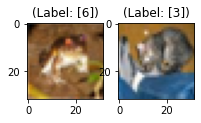

In [13]:
plt.figure(figsize=[3,3])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str([y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str([y_test[0][0]]) + ")"))

In [16]:
# Normalize the images
mean = 0.5
std = 0.5

def normalize_images(images):
    images = images.astype(np.float32) / 255.0  # Scale to [0, 1]
    return (images - mean) / std  # Normalize

x_train_normalized = normalize_images(x_train)
x_test_normalized = normalize_images(x_test)

# Flatten the images
x_train_images = x_train_normalized.reshape((len(x_train_normalized), 32 * 32 * 3))
x_test_images = x_test_normalized.reshape((len(x_test_normalized), 32 * 32 * 3))

In [18]:
label_image = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

In [19]:
#Iterations of KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_iterations = 5
accuracies = []

for i in range(n_iterations):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    knn.fit(x_train_images, y_train.ravel())
    
    y_pred = knn.predict(x_test_images)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy) #adds the value to the list!
    print(f"Accuracy for Nearest Neighbour {i + 1}:", accuracy)

average_accuracy = np.mean(accuracies)
print("Average Accuracy over", n_iterations, "iterations:", average_accuracy)

Accuracy for Nearest Neighbour 1: 0.3539
Accuracy for Nearest Neighbour 2: 0.3116
Accuracy for Nearest Neighbour 3: 0.3303
Accuracy for Nearest Neighbour 4: 0.3398
Accuracy for Nearest Neighbour 5: 0.3398
Average Accuracy over 5 iterations: 0.33507999999999993


In [ ]:
#Using PCA
from sklearn.decomposition import PCA
pca = PCA(0.8) #to obtain 80% of variance
pca.fit(x_train_images)
PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
x_train_img_pca = pca.transform(x_train_images)
x_test_img_pca = pca.transform(x_test_images)

n_iterations = 5
accuracies = []

for i in range(n_iterations):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    knn.fit(x_train_img_pca, y_train.ravel())
    
    y_pred = knn.predict(x_test_img_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy) #adds the value to the list!
    print(f"Accuracy for Nearest Neighbour {i + 1}:", accuracy)

average_accuracy = np.mean(accuracies)
print("Average Accuracy over", n_iterations, "iterations:", average_accuracy)

Accuracy for Nearest Neighbour 1: 0.3858
Accuracy for Nearest Neighbour 2: 0.3402
Accuracy for Nearest Neighbour 3: 0.3659
Accuracy for Nearest Neighbour 4: 0.376
Accuracy for Nearest Neighbour 5: 0.3808
Average Accuracy over 5 iterations: 0.36973999999999996


In [9]:
#t-SNE is told to be more accurate for CIFAR-10
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
x_train_img_tsne = pca.fit_transform(x_train_images)
x_test_img_tsne = pca.transform(x_test_images)

n_iterations = 5
accuracies = []

for i in range(n_iterations):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    knn.fit(x_train_img_tsne, y_train.ravel())
    
    y_pred = knn.predict(x_test_img_tsne)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy) #adds the value to the list!
    print(f"Accuracy for Nearest Neighbour {i + 1}:", accuracy)

average_accuracy = np.mean(accuracies)
print("Average Accuracy over", n_iterations, "iterations:", average_accuracy)


Accuracy for Nearest Neighbour 1: 0.3572
Accuracy for Nearest Neighbour 2: 0.315
Accuracy for Nearest Neighbour 3: 0.3334
Accuracy for Nearest Neighbour 4: 0.3424
Accuracy for Nearest Neighbour 5: 0.3447
Average Accuracy over 5 iterations: 0.33854


In [12]:
#Using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_img_lda = lda.fit_transform(x_train_images, y_train.ravel())
X_test_img_lda = lda.transform(x_test_images)

n_iterations = 5
accuracies = []

for i in range(n_iterations):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    knn.fit(x_train_img_tsne, y_train.ravel())
    
    y_pred = knn.predict(x_test_img_tsne)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy) #adds the value to the list!
    print(f"Accuracy for Nearest Neighbour {i + 1}:", accuracy)

average_accuracy = np.mean(accuracies)
print("Average Accuracy over", n_iterations, "iterations:", average_accuracy)

Accuracy for Nearest Neighbour 1: 0.3572
Accuracy for Nearest Neighbour 2: 0.315
Accuracy for Nearest Neighbour 3: 0.3334
Accuracy for Nearest Neighbour 4: 0.3424
Accuracy for Nearest Neighbour 5: 0.3447
Average Accuracy over 5 iterations: 0.33854


Test Accuracy: 0.4004


In [11]:
#Using Autoencoder